In [37]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 3))
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [38]:
sourceFilesPrefix="SamplesFromPaper//s"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data = scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
rate3, sample3_data = scipy.io.wavfile.read(sourceFilesPrefix+"3.wav")
rate4, sample4_data = scipy.io.wavfile.read(sourceFilesPrefix+"4.wav")
rate5, sample5_data = scipy.io.wavfile.read(sourceFilesPrefix+"5.wav")

In [39]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( vacuum cleaner \)

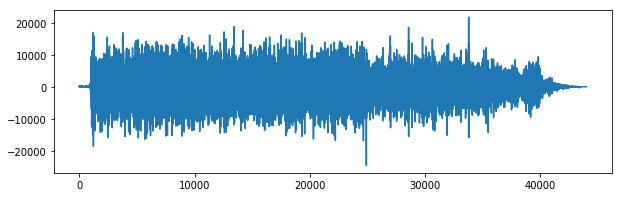

In [40]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

# Second input signal \( clapping \)

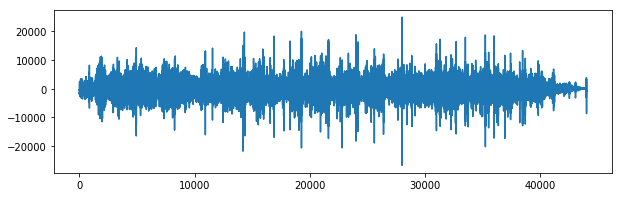

In [41]:
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
Audio(data=sample3_data, rate=16000)

# Third input signal \( laughter \)

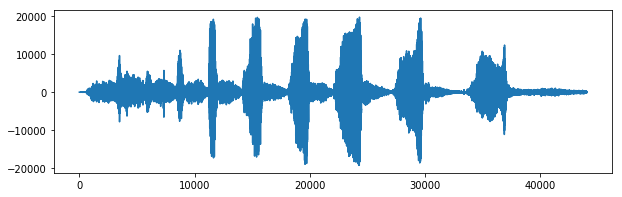

In [42]:
display(Markdown("# Third input signal \( laughter \)"))
plt.figure(1)
plt.plot(sample4_data)
plt.show()
Audio(data=sample4_data, rate=16000)

In [43]:
# Whiten the data
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3
med4=sample4_data.std(axis=0)
s4data=sample4_data/med4

orig=np.matrix([s2data,s3data,s4data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.77191,0.47520,0.58699],
             [0.33712,0.47563,0.20836],
             [0.96878,0.57618,0.65625]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
print("Correlation matrix: \n"+str(np.corrcoef(X)))

Mixing matrix: 
[[ 0.77191  0.4752   0.58699]
 [ 0.33712  0.47563  0.20836]
 [ 0.96878  0.57618  0.65625]]
Correlation matrix: 
[[ 1.          0.90849405  0.99879514]
 [ 0.90849405  1.          0.91174739]
 [ 0.99879514  0.91174739  1.        ]]


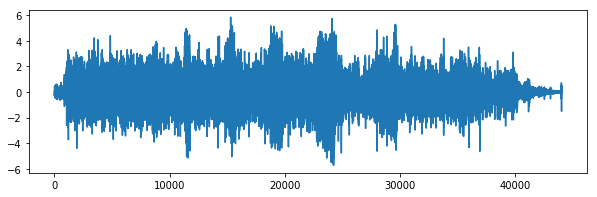

In [44]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

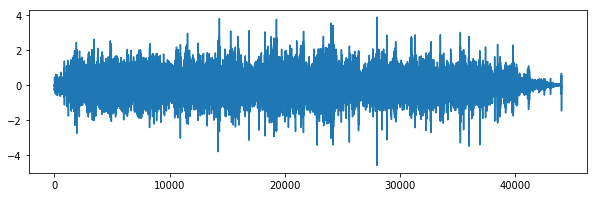

In [45]:
plt.figure(2)
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

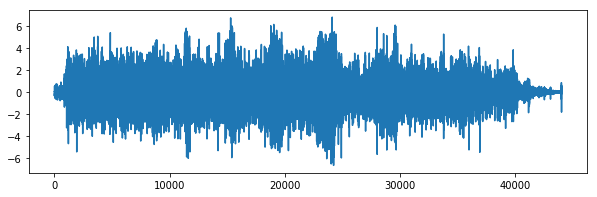

In [46]:
plt.figure(3)
plt.plot(X[2].T)
plt.show()
Audio(data=X[2], rate=16000)

# Mixed signals

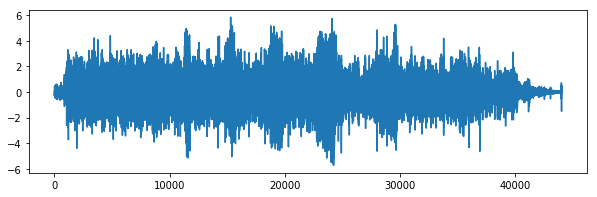

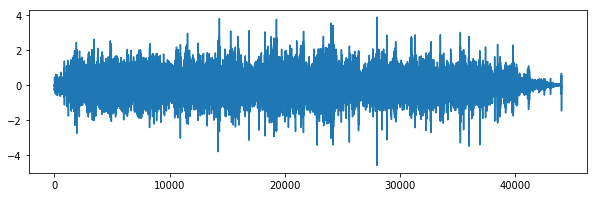

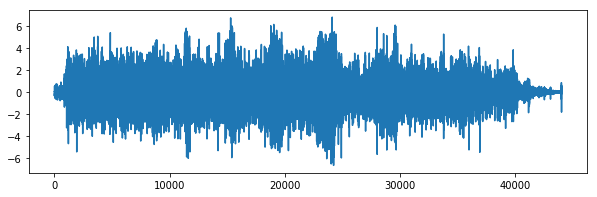

In [58]:
display(Markdown("# Mixed signals"))
plt.figure(1)
plt.plot(X[0].T)
plt.show()
plt.figure(1)
plt.plot(X[1].T)
plt.show()
plt.figure(1)
plt.plot(X[2].T)
plt.show()

In [47]:
def costFunc(Y,W):
    Z=sigmoid(Y)
    #print(np.dot(Z.T,Z).shape)
    c1=np.dot(Z.T,1-Z)
    c2=np.linalg.det(W)
    C1=np.log(c1)
    C2=np.log(c2)
    return np.sum(C1)

In [48]:
corr12=1
corr13=1
corr23=1
while (abs(corr12)>=3e-6 or abs(corr13)>=3e-6) or abs(corr23)>=3e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        aux=W+delW
        W=aux
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)
    print(corr)
    corr12=corr[1][0]
    corr13=corr[2][0]
    corr23=corr[2][1]
print(eta)

Initial guessed decomposition matrix: 
[[ 0.00865956  0.00279136  0.00066287]
 [ 0.00910025  0.00188726  0.00282618]
 [ 0.00605731  0.0094888   0.00391479]]
[[  1.00000000e+00   3.31392872e-06  -1.26922214e-06]
 [  3.31392872e-06   1.00000000e+00  -2.57217923e-06]
 [ -1.26922214e-06  -2.57217923e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00457456  0.00592215  0.00403561]
 [ 0.00025646  0.00631169  0.00678853]
 [ 0.00184633  0.00695493  0.00462996]]
[[  1.00000000e+00  -5.96081230e-06   1.72721393e-06]
 [ -5.96081230e-06   1.00000000e+00  -1.55084282e-06]
 [  1.72721393e-06  -1.55084282e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.0013325   0.0039981   0.00041551]
 [ 0.00593941  0.00398639  0.00125064]
 [ 0.0062272   0.00617534  0.00441407]]
[[  1.00000000e+00  -3.96302610e-06  -1.12069031e-06]
 [ -3.96302610e-06   1.00000000e+00   6.27415864e-08]
 [ -1.12069031e-06   6.27415864e-08   1.00000000e+00]]
Initial guessed decomposition matrix: 
[

In [49]:
print("Final guessed decomposition matrix: \n"+str(W))

Final guessed decomposition matrix: 
[[ 0.09401059 -0.0099358  -0.07081543]
 [-0.08042709 -0.00625184  0.07312972]
 [ 0.03319011  0.02402432 -0.03571229]]


In [50]:
# RECOVERED SIGNALS MATRIX
Y2=np.dot(W,X)
#Y = (Y - Y.min()) / (Y.max() - Y.min());

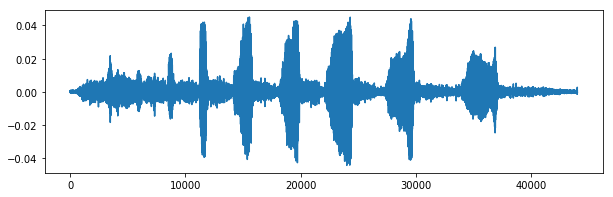

In [51]:
# FIRST RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

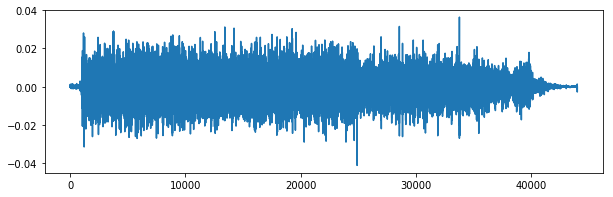

In [52]:
# SECOND RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)

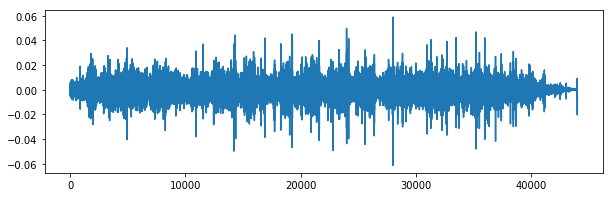

In [53]:
# THIRD RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()
Audio(data=Y2[2], rate=16000)

# First recoverd signal \( laughter \)

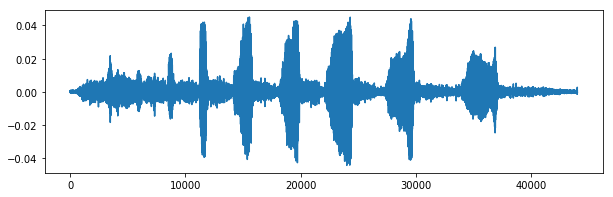

# Second recoverd signal \( vacuum cleaner \)

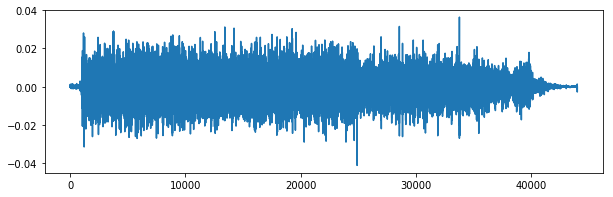

# Third recoverd signal \( clapping \)

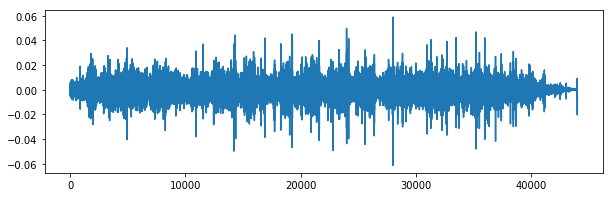

In [56]:
display(Markdown("# First recoverd signal \( laughter \)"))
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
display(Markdown("# Second recoverd signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
display(Markdown("# Third recoverd signal \( clapping \)"))
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()

# First input signal \( vacuum cleaner \)

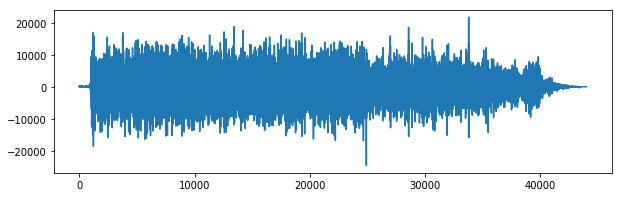

# Second input signal \( clapping \)

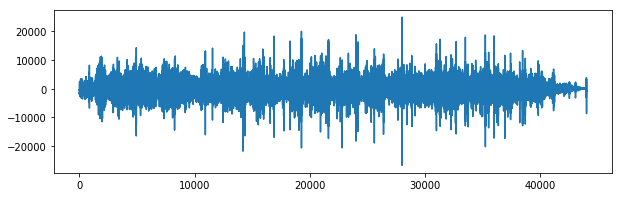

# Third input signal \( laughter \)

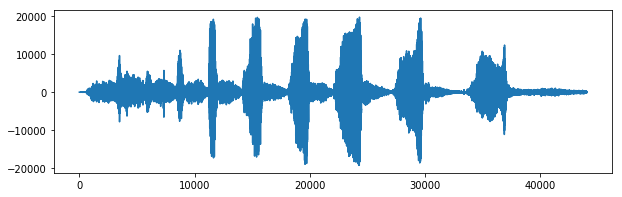

In [57]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
display(Markdown("# Third input signal \( laughter \)"))
plt.figure(1)
plt.plot(sample4_data)
plt.show()